---

## __World Happiness Report 2019__

The purpose of this project is to analyse the 'World Happiness Report' dataset specificly the happiness report of 2019. The main objectives are:

* Understanding what has the greatest effects on happiness of a given society
* Finding relations between these factors
* Visualizing this data for convenience and greater understanding


---

### **1. Setting up the environment**

The following lines of code are used to import python libraries that are needed for the analysis.

In [10]:
import matplotlib.pyplot as plt# data visualization
import seaborn as sns# data visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # Remove future warnings

---

### **2. Exploratory Data Analysis**

This step involves reading the dataset, analysing the dataset to understand its structure, and its characteristics (e.g. Mean, Min, Max, etc.)
* #### **Check Dataset Information**
  The following code: Prints first 5 rows of the dataset, shows the structure of the dataset, including column types and missing data, and shows a summary of key statistics (mean, min, max, standard deviation, etc.) for numerical columns.

In [11]:
report_2019 = pd.read_csv('World Happiness Report 2019.csv')

report_2019.head() 
report_2019.info()
report_2019.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


---

* #### **Visualize Data Distributions**
Plot histograms or box plots to get an understanding of the distribution of values for each feature.

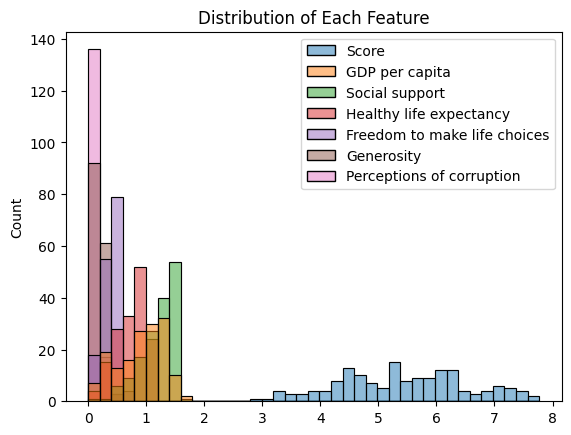

<Axes: xlabel='Score', ylabel='Count'>

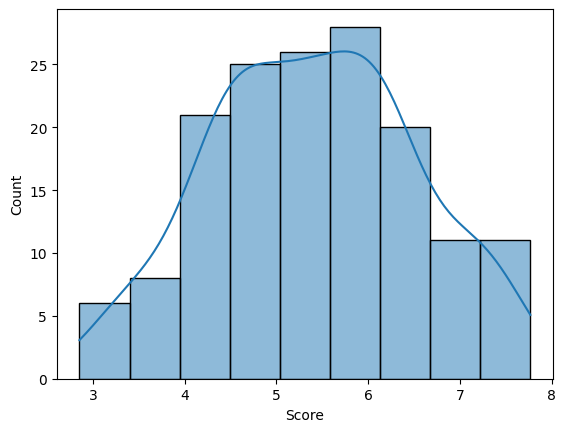

In [12]:
report_2019_2 = report_2019.drop('Overall rank',axis=1)
plt.title('Distribution of Each Feature')
sns.histplot(report_2019_2, kde=False)
plt.show()
sns.histplot(report_2019['Score'], kde=True)

---

### **3. Data Cleaning**
Data cleaning is an essential step to prepare dataset for analysis. It usually involves: 
* Handling Missing Values
* Handling Duplicate Rows
* Replacing Infinite Values
* Normalize or Scale Data
* Rename Columns for Clarity

In [13]:
report_2019.duplicated().sum() # Check for duplicates
report_2019.isnull().sum() # Check for null values
report_2019.replace([np.inf, -np.inf], np.nan, inplace=True)
# Check if there are any remaining infinite values
report_2019.isin([np.inf, -np.inf]).sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

The following code is used to change the title of index column, change 'Country or region' to 'Region', and normalize the generosity column to make it easier to visualize.

In [14]:
report_2019 = report_2019.rename(columns = {'Country or region': 'Region'}) # Rename column 
report_2019.index.name = 'Index' #change index title

# Normalize
report_2019['Generosity'] = (report_2019['Generosity'] > 0.18).astype(int)
report_2019.head()

,Overall rank,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Index,,,,,,,,,
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,1,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,1,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,1,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,1,0.298


---

### **4. Analysis and Visualization**
Once the dataset is cleaned, we can perform meaningful analysis and create insightful visualizations. 

* **Top 10 Happiest Countries**
  
**Analysis:**
  Identify and visualize the top 10 happiest countries based on the Score.

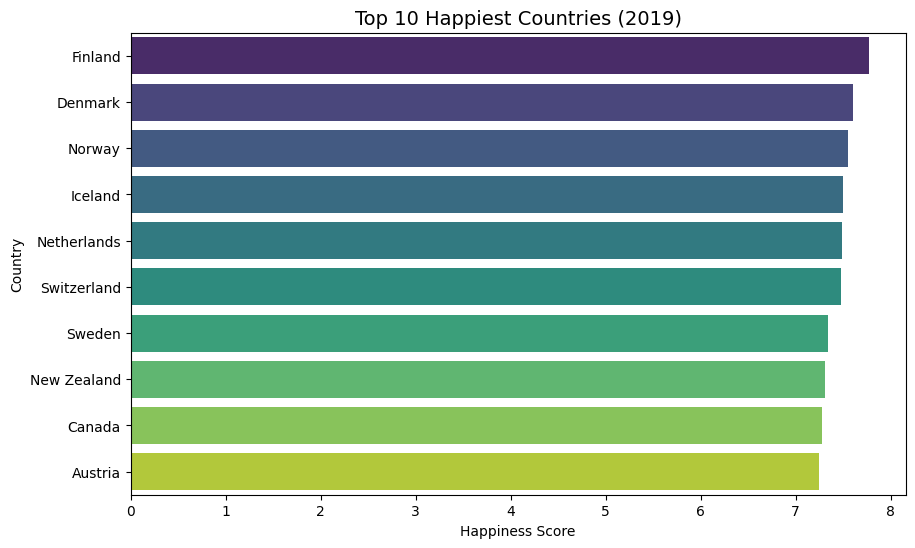

In [15]:
top_10_countries = report_2019.nlargest(10, 'Score')
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Region', data=top_10_countries, palette='viridis')
plt.title('Top 10 Happiest Countries (2019)', fontsize=14)
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

---

* **Factors Correlated with Happiness (Top 10 Countries)**

In [16]:
top_10_countries[['Region', 'Score', 'GDP per capita', 'Social support', 
                         'Healthy life expectancy', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption']]
correlation = top_10_countries[['Score', 'GDP per capita', 'Social support', 
                         'Healthy life expectancy', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption']].corr()
correlation

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.194148,0.689305,-0.502092,0.571018,-0.670746,0.281962
GDP per capita,0.194148,1.000000,0.013140,0.361410,0.074698,0.316890,-0.064808
Social support,0.689305,0.013140,1.000000,-0.140487,0.762610,-0.313923,-0.124956
Healthy life expectancy,-0.502092,0.361410,-0.140487,1.000000,-0.005965,0.543627,-0.279876
Freedom to make life choices,0.571018,0.074698,0.762610,-0.005965,1.000000,-0.289841,0.311985
Generosity,-0.670746,0.316890,-0.313923,0.543627,-0.289841,1.000000,-0.292604
Perceptions of corruption,0.281962,-0.064808,-0.124956,-0.279876,0.311985,-0.292604,1.000000


---

* **Individual plots for correlation (Top 10 Countries)**

Text(0.5, 1.02, 'Plots for each Factor')

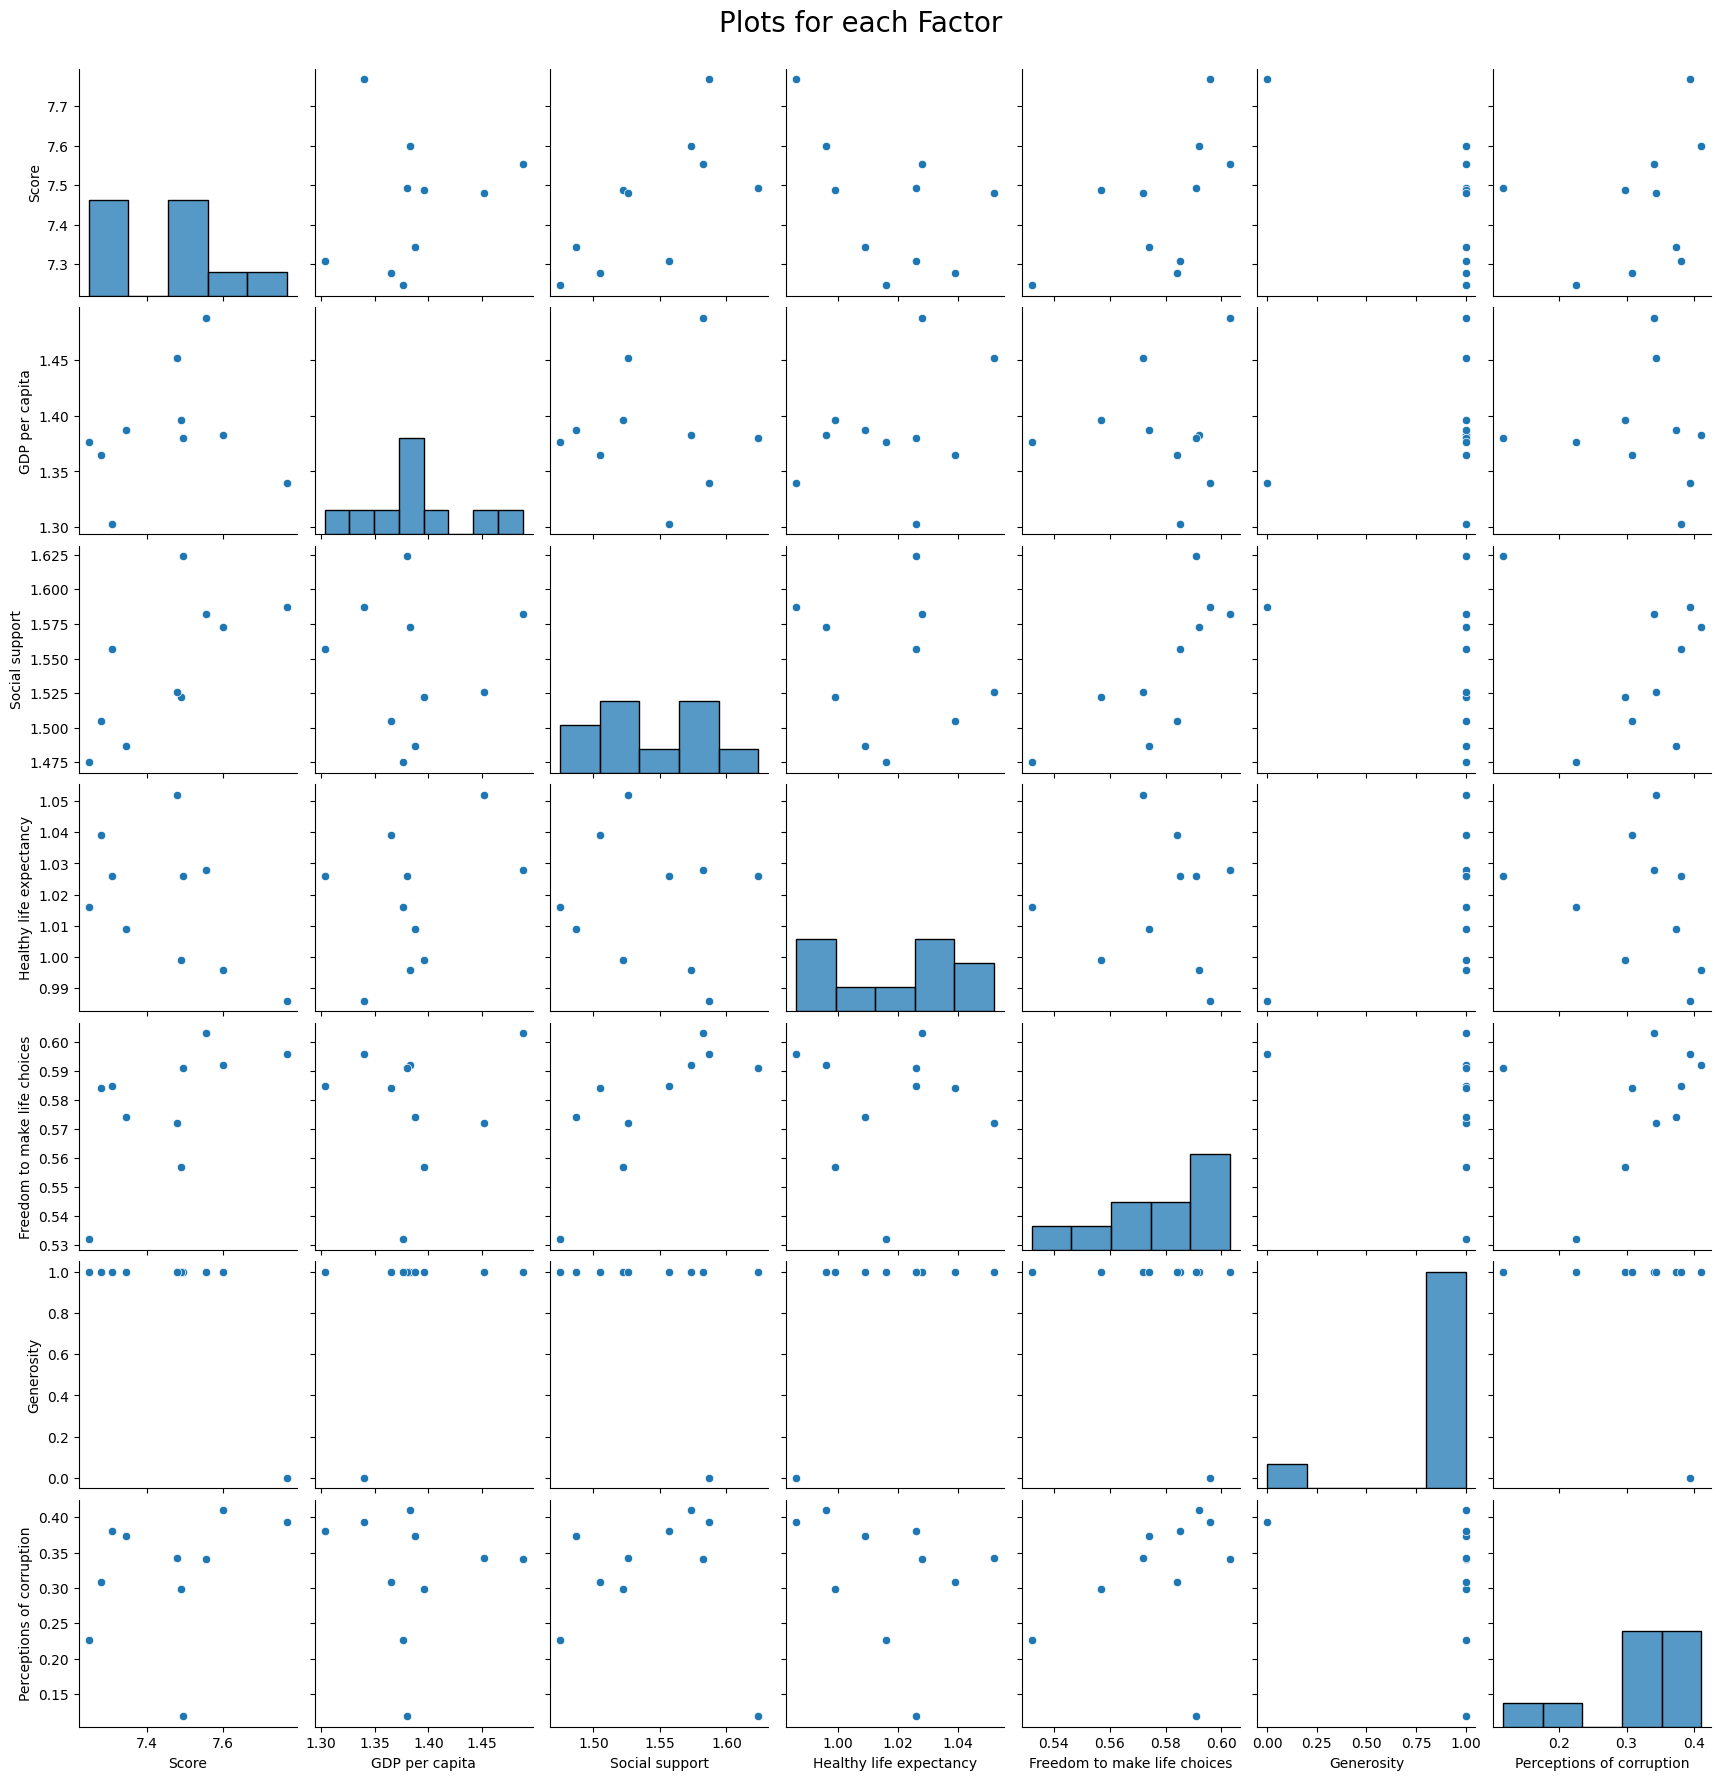

In [17]:
sns.pairplot(top_10_countries[['Score', 'GDP per capita', 'Social support', 
                         'Healthy life expectancy', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption']])
plt.suptitle('Plots for each Factor',y=1.02, fontsize=20)

---

* **Heatmap for correlation (All Countries)**

**Analysis:**
Visualize the distribution of happiness scores across all countries.

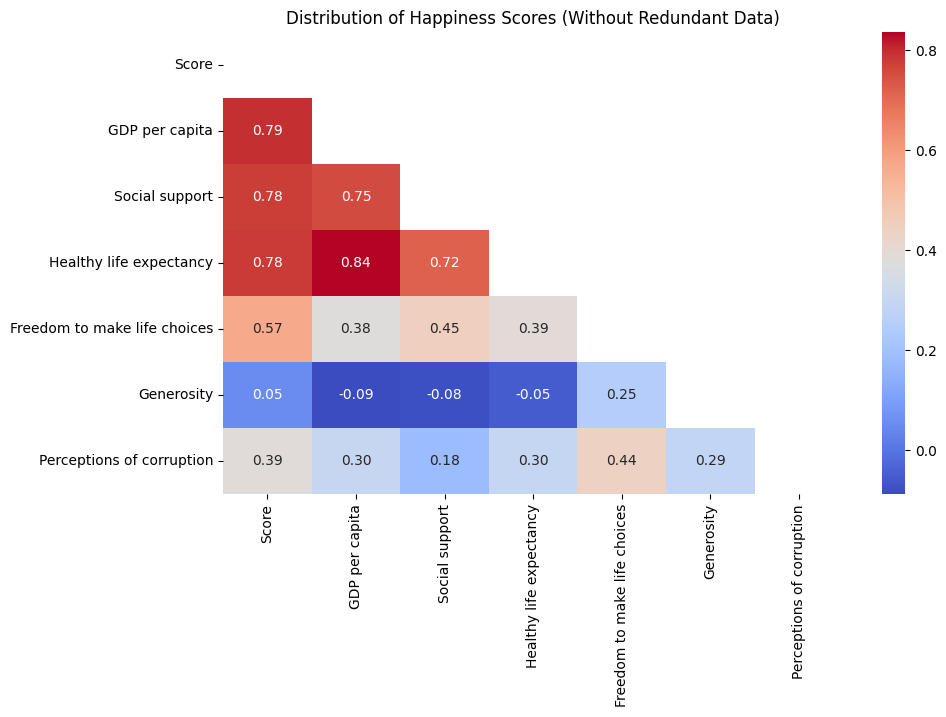

In [18]:
# Compute correlations
correlation = report_2019[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
                           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
# Heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,mask= mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Distribution of Happiness Scores (Without Redundant Data)')
plt.show()


**Strongest Correlations:** 
- The strongest positive correlations are observed between "Happiness Score" and "Social support" (0.78), "Healthy life expectancy" (0.78), and "GDP per capita" (0.79)

**Interpretations:**
- **Socioeconomic Factors:** Economic prosperity (GDP per capita) and access to quality healthcare (Healthy life expectancy) appear to be strongly linked to happiness.

- **Social Support:** Social support, the feeling of having strong social connections and relationships, is a significant predictor of happiness.

---

*  **How is the score affected by Social Support**

**Analysis:**
Find and visualize the relation between Score and Social support

Text(0.5, 1.0, 'Score and Social Support Relation')

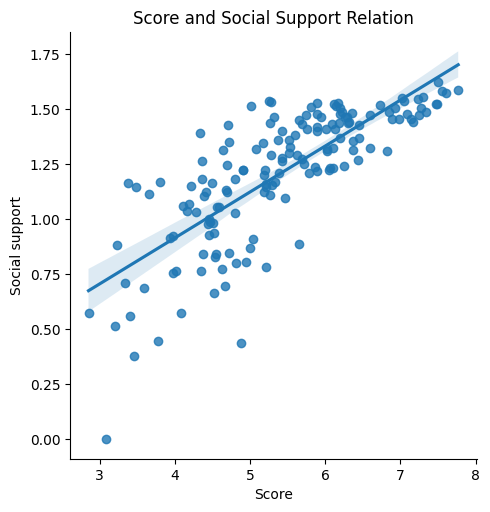

In [19]:
sns.lmplot(data = report_2019,x= 'Score',y= 'Social support')
plt.title('Score and Social Support Relation')

The scatter plot above illustrates the relationship between **Social Support** and the **Happiness Score**. The regression line indicates that the happiness score tends to increase as social support improves. This observation is further validated by the **heatmap**, which highlights a strong positive correlation between these two variables.

The data points seem to follow a linear trend, suggesting a consistent increase in social support as the happiness score increases.

---

* **How is score affected by freedom to make choices and how many choices are generous**

**Analysis:**
Find the relation between Freedom and Score, and how many choices made were generous


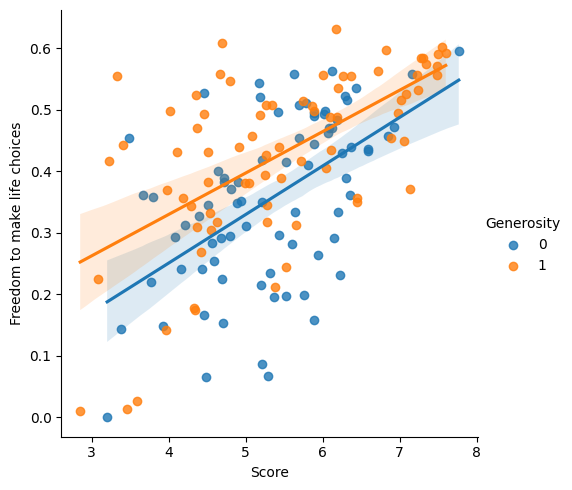

In [20]:
sns.lmplot(data = report_2019,x= 'Score',y= 'Freedom to make life choices', hue = 'Generosity')

The plot shows a positive relationship between **Freedom to Make Life Choices** and **Happiness Score** for both groups (Generosity = 0 and Generosity = 1). This suggests that as individuals experience more freedom to make life choices, happiness scores increase.

The orange regression line (Generosity = 1) is slightly above the blue regression line (Generosity = 0). This indicates that countries with higher generosity levels tend to have slightly higher happiness scores for the same level of freedom.

Across all countries, there is a strong positive relationship between freedom and happiness. The presence of generosity enhances happiness scores, as seen by the higher orange regression line. This suggests that generosity amplifies the positive impact of freedom on happiness.

---

**Note:**
- *Correlation vs. Causation*: The plots only shows a correlation between happiness, perceived corruption, generosity etc. It doesn't establish a cause-and-effect relationship.

---